In [3]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from scipy.stats import poisson
from scipy.stats import norm

%matplotlib inline


In [4]:
# Name of test to plot
name = "CA"

files = glob("Data/*.csv")
files.sort()
for (i, f) in enumerate(files):
    print(f"{i:3d}: {f}")
iFile = int(input("Enter file number: "))
dataFile = files[iFile]
print(f"Using {dataFile}")

if name not in dataFile:
    raise WrongTestFile(f"Wrong test file for {name}")
    
# Check if data file from this test
with open(dataFile, 'r') as fp:
    line = fp.readline()

data = np.genfromtxt(dataFile, delimiter=',', comments='#')
time = data[:,0] - data[0,0]
counts = data[:,1]
avgCounts = data[:,2]
avgCPS = counts.mean()
nPoints = len(time)
print(f"There are {nPoints} points")
print(f"The average is {avgCPS:.3f}")
figName = "Figures/" + dataFile[dataFile.find('2'):dataFile.find('.')] + r"_%.03d.png"
iPlot = 0

  0: Data/2022-03-25-1530-CA.csv
  1: Data/2022-03-25-1829-CA.csv
  2: Data/2022-03-25-1843-CA.csv
  3: Data/2022-03-25-1852-CA.csv
  4: Data/2022-03-25-1903-CA.csv
  5: Data/2022-03-26-1021-CA.csv
  6: Data/2022-03-26-1023-CA.csv
  7: Data/2022-03-26-1139-CA.csv
  8: Data/2022-03-28-1641-CA.csv
  9: Data/2022-03-28-1924-CA.csv
 10: Data/2022-03-28-2004-CA.csv
 11: Data/2022-03-28-2127-CA.csv
 12: Data/2022-03-29-0806-CA.csv
 13: Data/2022-03-29-1603-CA.csv
 14: Data/2022-04-07-1204-Turb.csv
 15: Data/2022-06-06-1921-2_0mm.csv
 16: Data/2022-06-06-2119-10mm.csv
 17: Data/2022-06-06-2206-18mm.csv
 18: Data/2022-06-06-2344-5_2mm.csv
 19: Data/2022-06-07-0617-13_2mm.csv
Enter file number: 13
Using Data/2022-03-29-1603-CA.csv
There are 161593 points
The average is 9.143


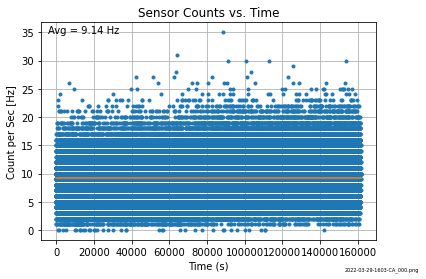

In [5]:
timeHr = time/3600
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, counts, '.')
ax.plot((time[0],time[-1]), (avgCPS,avgCPS))
ax.plot()
ax.grid()
ax.set_title("Sensor Counts vs. Time")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Count per Sec [Hz]")
ax.text(.02,.95, f"Avg = {avgCPS:.2f} Hz", transform=ax.transAxes)

iPlot = 0
fn = figName%iPlot
ax.text(1, 0.02,fn[8:], transform=fig.transFigure, \
        ha='right', fontsize=5)
fig.savefig(fn, dpi=150)
iPlot += 1
pass

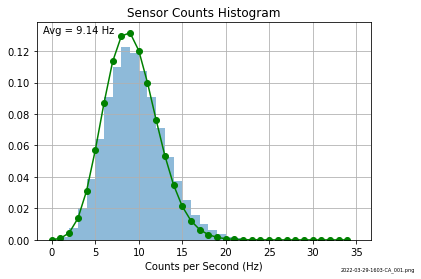

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
# [yVals, xTmp, bars] = ax.hist(counts, bins=int(np.sqrt(nPoints)), \
#                               density=True, alpha=0.5)
myBins = np.array(range(int(max(counts+1))))
[yVals, xTmp, bars] = ax.hist(counts, bins = myBins, \
                              density=True, alpha=0.5)
ax.grid()
ax.set_title("Sensor Counts Histogram")
ax.set_xlabel("Counts per Second (Hz)")
ax.text(.02,.95, f"Avg = {avgCPS:.2f} Hz", transform=ax.transAxes)

xVals = np.array(np.floor(0.5 * (xTmp[1:]+xTmp[:-1]))+0.5, dtype=int)
plt.plot(xVals,poisson.pmf(xVals, avgCPS), '-og')

iPlot = 1
fn = figName%iPlot
ax.text(1, 0.02,fn[8:], transform=fig.transFigure, \
        ha='right', fontsize=5)
fig.savefig(fn, dpi=150)
iPlot += 1
pass

In [7]:
print(max(counts))
print(np.array(range(int(max(counts+1)))))
print(counts.mean())

35.0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
9.142580433558384


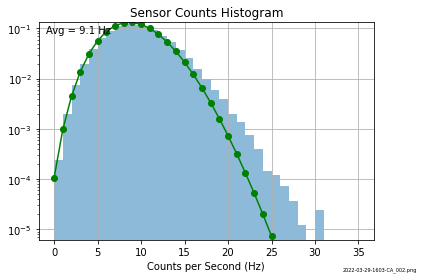

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
[yVals, xTmp, bars] = ax.hist(counts, bins=myBins, \
                              density=True, log=True, alpha=0.5)
xVals = np.array(np.floor(0.5 * (xTmp[1:]+xTmp[:-1]))+0.5, dtype=int)
ax.grid()
ax.set_title("Sensor Counts Histogram")
ax.set_xlabel("Counts per Second (Hz)")
ax.set_ylim(ymax=max(max(yVals),max(poisson.pmf(xVals, avgCPS))), ymin=min(yVals[yVals>0]))
ax.text(.02,.95, f"Avg = {avgCPS:.1f} Hz", transform=ax.transAxes)

xVals = np.array(np.floor(0.5 * (xTmp[1:]+xTmp[:-1]))+0.5, dtype=int)
plt.plot(xVals,poisson.pmf(xVals, avgCPS), '-og')

iPlot = 2
fn = figName%iPlot
ax.text(1, 0.02,fn[8:], transform=fig.transFigure, \
        ha='right', fontsize=5)
fig.savefig(fn, dpi=150)
iPlot += 1
pass

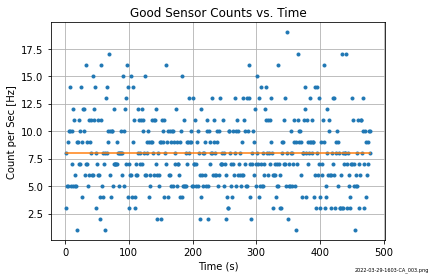

In [9]:
time0 = 0
time1 = 480
counts0 = 0
counts1 = 50
iWhere = (time > time0) & (time < time1) & (counts > counts0) & (counts < counts1)
timeGood = time[iWhere]
countsGood = counts[iWhere]
avgCPS = countsGood.mean()

timeHr = time/3600
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(timeGood, countsGood, '.')
ax.plot((timeGood[0],timeGood[-1]), (avgCPS,avgCPS))
ax.plot()
ax.grid()
ax.set_title("Good Sensor Counts vs. Time")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Count per Sec [Hz]")

iPlot = 3
fn = figName%iPlot
ax.text(1, 0.02,fn[8:], transform=fig.transFigure, \
        ha='right', fontsize=5)
fig.savefig(fn, dpi=150)
iPlot += 1
pass

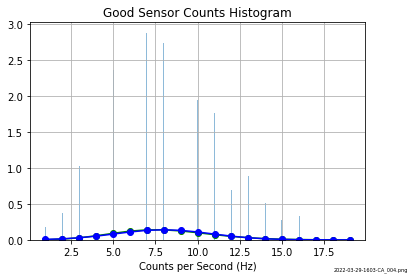

In [10]:
avgGoodCPS = countsGood.mean()

fig = plt.figure()
ax = fig.add_subplot(111)
[yVals, xTmp, bars] = ax.hist(countsGood, bins=int(np.sqrt(nPoints)), \
                              density=True, alpha=0.5)
xVals = 0.5 * (xTmp[1:]+xTmp[:-1])
ax.grid()
ax.set_title("Good Sensor Counts Histogram")
ax.set_xlabel("Counts per Second (Hz)")

xAx = np.array(range(int(xTmp[0]), int(round(xTmp[-1] + 0.5))))
plt.plot(xAx,poisson.pmf(xAx, avgGoodCPS), '-og')
plt.plot(xAx,norm.pdf(xAx, avgGoodCPS, np.sqrt(avgGoodCPS)), '-ob')

iPlot = 4
fn = figName%iPlot
ax.text(1, 0.02,fn[8:], transform=fig.transFigure, \
        ha='right', fontsize=5)
fig.savefig(fn, dpi=150)
iPlot += 1
pass

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
[yVals, xTmp, bars] = ax.hist(countsGood, bins=int(np.sqrt(nPoints)), \
                              density=True, log=True, alpha=0.5)
xVals = 0.5 * (xTmp[1:]+xTmp[:-1])
ax.grid()
ax.set_title("Good Sensor Counts Histogram")
ax.set_xlabel("Counts per Second (Hz)")

xVals = np.array(np.floor(0.5 * (xTmp[1:]+xTmp[:-1]))+0.5, dtype=int)
plt.plot(xAx,poisson.pmf(xAx, avgGoodCPS), '-og')
plt.plot(xAx,norm.pdf(xAx, avgGoodCPS, np.sqrt(avgGoodCPS)), '-ob')

iPlot = 5
fn = figName%iPlot
ax.text(1, 0.02,fn[8:], transform=fig.transFigure, \
        ha='right', fontsize=5)
fig.savefig(fn, dpi=150)
iPlot += 1
pass